In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [43]:
gold = pd.read_csv('/content/gld_price_data.xls')

In [44]:
gold.describe() #GLD --> gold price

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [45]:
corr = gold.corr()

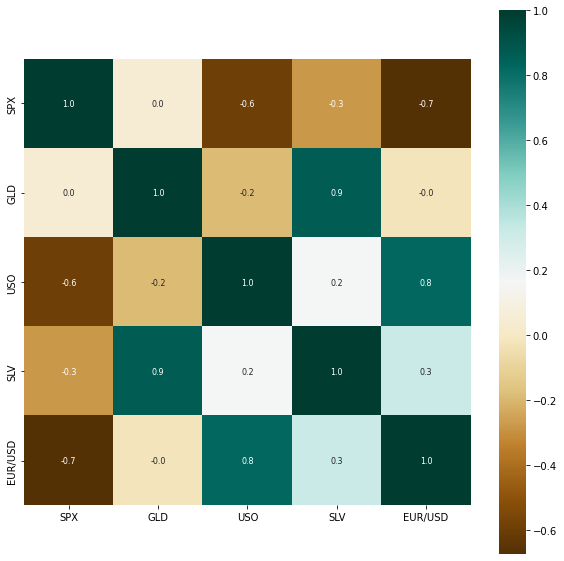

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , cbar=True , square=True , fmt='.1f',annot=True,annot_kws={'size':8},
            cmap='BrBG')

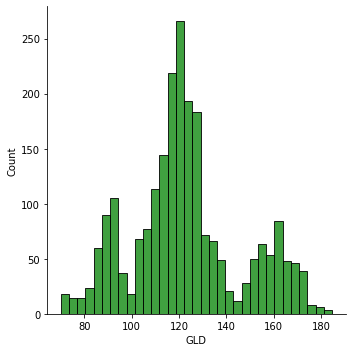

In [47]:
sns.displot(gold['GLD'],color='Green')

In [48]:
X = gold.drop(['Date','GLD'],axis=1)
Y=gold['GLD']

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [50]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

In [51]:
prediction = model.predict(X_test)

In [52]:
error = metrics.r2_score(y_test , prediction)
print(error)

0.989096750522585


In [53]:
y_test = list(y_test)

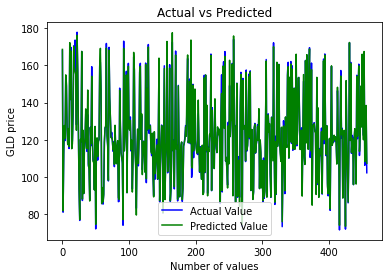

In [57]:
plt.plot(y_test,color='Blue',label='Actual Value')
plt.plot(prediction,color='green',label='Predicted Value')
plt.title('Actual vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()